# LABORATORIO 1 - Práctica 3: Preparación y visualización de Datos
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Ejercicio 1](#id1)
1. [Ejercicio 2](#id2)
1. [Ejercicio 3](#id3)
1. [Ejercicio 4](#id4)

<div id='id0'/>

## *Introducción*

---
En esta parte realizamos un análisis de componentes, ya que hay ciertos casos en los que  las  variables  no  se  pueden  representar  visualmente  debido  a  que  necesitaríamos  varias dimensiones  para ello. Utilizaremos esta metodología para a partir de un set multidimensional podemos  transformarlo  para  poder  explicar  gran  parte  de  la  información  en  2  o  3  dimensiones.


### Librerias

In [61]:
#importación de librerias
import csv
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### Lectura del CSV

In [62]:
#lectura del CSV
Pokemon_Dataset = pd.read_csv('pokemon.csv')
#dataset
Pokemon_Dataset.head(10)

,Pokémon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4
5,PALKIA,Agua,3,4,3,5,3,4
6,MILOTIC,Agua,3,2,2,4,3,3
7,AZUMARILL,Agua,3,2,2,2,2,2
8,LEAFEON,Planta,2,4,4,2,2,3
9,ABOMASNOW,Planta,3,3,2,3,2,2


<div id='id1'>

### *Ejercicio 1*

---
Primero estandarizaremos los datos como nos pide el enunciado, para que las diferencias de rango no supongan un problema a la hora de procesar la información.

#### Estandarizado de datos

In [63]:
# Seleccionar solo las columnas que quieres estandarizar
Pokemon_estand = Pokemon_Dataset[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']]

# Instanciar un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el objeto StandardScaler a los datos seleccionados
scaler.fit(Pokemon_estand)

# Transformar los datos seleccionados con el objeto StandardScaler
Pokemon_Dataset_Final = scaler.transform(Pokemon_estand)

# Convertir la matriz resultante en un DataFrame
Pokemon_Dataset_Final1 = pd.DataFrame(Pokemon_Dataset_Final, columns=Pokemon_estand.columns)
print(Pokemon_Dataset_Final)

[[-0.32616404  0.05431254 -0.75        0.56415195 -0.5         1.03797547]
 [-0.32616404  0.05431254 -0.75       -1.1717002  -0.5         0.1353881 ]
 [-0.32616404  0.05431254  1.75       -0.30377413 -0.5        -1.66978662]
 [ 0.97849211  2.22681433  0.5         0.56415195  0.75        1.03797547]
 [-0.32616404  0.05431254  0.5         0.56415195 -0.5         1.03797547]
 [ 0.97849211  1.14056344  0.5         1.43207802  0.75        1.03797547]
 [ 0.97849211 -1.03193835 -0.75        0.56415195  0.75        0.1353881 ]
 [ 0.97849211 -1.03193835 -0.75       -1.1717002  -0.5        -0.76719926]
 [-0.32616404  1.14056344  1.75       -1.1717002  -0.5         0.1353881 ]
 [ 0.97849211  0.05431254 -0.75       -0.30377413 -0.5        -0.76719926]
 [-1.63082018 -2.11818924 -0.75       -1.1717002  -1.75       -1.66978662]
 [-0.32616404  1.14056344 -0.75       -1.1717002  -0.5         0.1353881 ]
 [-0.32616404 -1.03193835 -0.75        0.56415195  0.75        1.94056283]
 [-0.32616404  0.05431254

<div id='id2'>

### *Ejercicio 2*

---

A partir de los datos del ejercicio anterior, crearemos la matriz de covarianza mediante el método "cov", dónde se utiliza la matriz traspuesta para poder obtener después los correctos autovalores y los autovectores.
### Cálculo la matriz de covarianza para obtener los autovalores y autovectores

In [64]:
# Calcular la matriz de covarianza
matriz_covarianza = np.cov(Pokemon_Dataset_Final.T)

# Calcular los autovalores y autovectores de la matriz de covarianza
autovalores, autovectores = np.linalg.eig(matriz_covarianza)

### Dataframe con porcentaje de varianza y el acumulado por cada componente.

In [65]:
Pokemon_Covar = np.cov(Pokemon_Dataset_Final1.T)

# Calcular los autovalores y autovectores de la matriz de covarianza
autovalores, autovectores = np.linalg.eig(Pokemon_Covar)

# Calcular el total de varianza
varianza_total = np.sum(autovalores)
# Calcular el porcentaje de varianza explicado por cada componente
varianza = [(i / varianza_total)*100 for i in sorted(autovalores, reverse=True)]
# Calcular el acumulado de varianza explicado
Varianza_Acumulada = np.cumsum(varianza)

# Crear un DataFrame con el porcentaje de varianza y el acumulado
Dataset_Final = pd.DataFrame({'Variance Explained': varianza,
                              'Cumulative Variance': Varianza_Acumulada})


print("Autovaloress", autovalores)
print("Autovectores", autovectores)
Dataset_Final.head(6)


Autovaloress [2.62997944 1.55066147 0.16420572 0.47459774 0.71552145 0.78082366]
Autovectores [[ 0.45454125  0.15847313  0.37672419 -0.07820604  0.78451794  0.06908557]
 [ 0.45072878 -0.25198079 -0.491921    0.1067326  -0.02435867  0.69237113]
 [ 0.31882326 -0.63200759  0.5475605   0.33202671 -0.277256   -0.10946693]
 [ 0.42331653  0.38227978 -0.30437481  0.61163075 -0.07575687 -0.4496554 ]
 [ 0.48098891 -0.16852151 -0.23006595 -0.68447289 -0.16380914 -0.43815894]
 [ 0.27935701  0.58087953  0.41315342 -0.17220602 -0.52392254  0.33119957]]


,Variance Explained,Cumulative Variance
0,41.641341,41.641341
1,24.552140,66.193481
2,12.363041,78.556522
3,11.329090,89.885612
4,7.514464,97.400076
5,2.599924,100.000000


Se quiere saber cuál es el menor número de autovectores o componentes principales, con el que podemos expresar “la esencia principal” de la información contenida en ese dataset. 
Para ello, usaremos un métrica que se conoce como “varianza explicada”, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.
Se ha decidido realizar un diagrama de barras para la fácil visualización de la varianza de cada componente, así como la linea azul discontinua que indica el cúmulo de varianzas individuales.

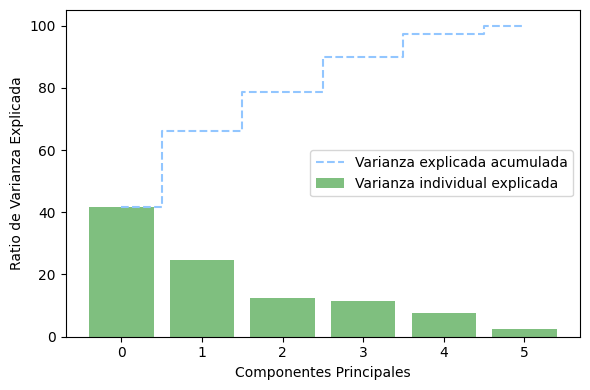

In [66]:
#Creación de la figura del diagrama de barras para representar la varianza individual y acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), varianza, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(6), Varianza_Acumulada, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

Este Data Frame lo que quiere explicar es cuál es el número menor de componentes principales, con el que podemos representar la mayoría de la información, reduciendo así la dimensionalidad. Como podemos ver gracias a la varianza acumulada, con dos componentes podemos representar más de la mitad de la información original:


* Con dos componentes perdemos el 33% de los datos.
* Con tres componentes representa el 78.56% de los datos.

<div id='id3'>

### *Ejercicio 3*

---
Representación gráfica de los individuos del dataset. 

Autovalores en orden descendiente:
2.629979441140372
1.550661470614857
0.7808236593436158
0.7155214470319362
0.4745977383380433
0.16420571721538674

Matriz W:
 [[ 0.45454125  0.15847313]
 [ 0.45072878 -0.25198079]
 [ 0.31882326 -0.63200759]
 [ 0.42331653  0.38227978]
 [ 0.48098891 -0.16852151]
 [ 0.27935701  0.58087953]]


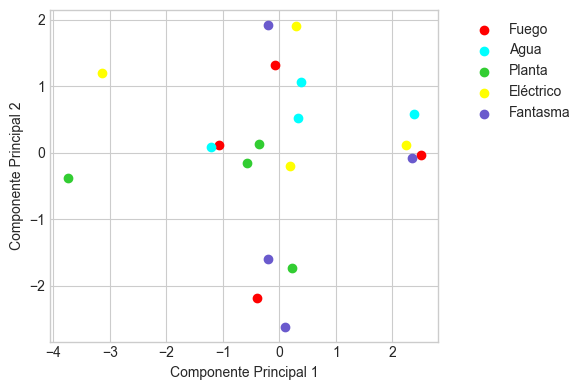

In [67]:
# Creación del diagrama de dispersión
#Cogemos la columna de tipos que utilizamos para mostrarlo en la gráfica
columna_tipo = Pokemon_Dataset.iloc[:,1].values
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(autovalores[i]), autovectores[:,i]) for i in range(len(autovalores))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])


#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))
#print('\nMatriz W:\n', matrix_w)

#Introducimos la matriz de pares autovalor-autovector en el eje Y
Y = Pokemon_Dataset_Final.dot(matrix_w)

#Creamos la grafica mostrando una leyenda por tipos y según las dos componentes principales
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Fuego', 'Agua', 'Planta', 'Eléctrico', 'Fantasma'),
                        ('red', 'cyan', 'limegreen', 'yellow', 'slateblue')):
        plt.scatter(Y[columna_tipo==lab, 0],
                    Y[columna_tipo==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    


Elegimos los cuatro datos que se encuentran más a la derecha, de estos datos podemos decir que:

* Al estar relativamente juntos, estos individuos tienen una fuerte correlación
* Podemos afirmar que los valores de sus características son muy parecidas pese a ser de distito tipo
* Podríamos crear una clase a partir de ellos para reducir la complejidad al clasificarlos
* En la componente principal 1 tiene una gran representación mientras que la componente 2 tiene una representación media

<div id='id4'>

### *Ejercicio 4*

---
Ejercicios 1, 2 y 3 con la libreria Scitik-Learn. 

## Librerias

In [68]:
#Esta función de la librería scikit-learn nos realiza un análisis de componentes principales, reduce la dimensionalidad
from sklearn.decomposition import PCA

Comparando los datos de los autovalores y autovectores no hay mucha diferencia, solamente unas cuantas décimas.

Con la librería Scikit-learn utilizamos menos líneas para sacar los valores, ya que con la función pca, nos permite hacer un análisis de componentes con sus propias funciones que agrupan varias operaciones en una sola. 

Autovalores:  [2.41186867 1.35045835 0.80348726 0.48151577 0.37524859 0.12478978]
Autovectores:  [[-0.32084942 -0.3190864  -0.11086561 -0.64458144 -0.31242477 -0.5194746 ]
 [-0.14373272 -0.48249794 -0.59670858  0.1646313  -0.32821592  0.50561483]
 [-0.06823637  0.54873505 -0.05451283 -0.60792237 -0.13338557  0.55127187]
 [-0.76537709 -0.21711697  0.43556921  0.03639613  0.31229582  0.28015038]
 [-0.28774462  0.33396545  0.24206283  0.38855372 -0.76546294 -0.1008375 ]
 [ 0.45071198 -0.45342778  0.61673421 -0.18852858 -0.30563242  0.28626328]]


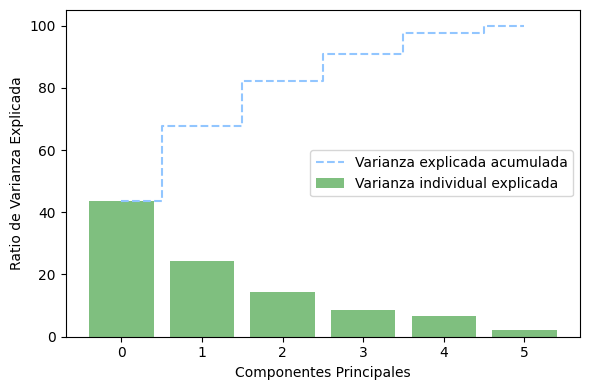

,component,variance_ratio,variance_cumulative
0,1,43.477709,43.477709
1,2,24.344126,67.821834
2,3,14.484116,82.305950
3,4,8.680075,90.986025
4,5,6.764443,97.750469
5,6,2.249531,100.000000


In [69]:
#Instanciamos un objeto PCA
pca = PCA()

#Pokemon_estand = Pokemon_Dataset[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']]
#Ajustamos los datos del dataframe creado
pca.fit(Pokemon_estand)

# Obtener autovalores y autovectores
pcautovalores = pca.explained_variance_
pcautovectores = pca.components_

print("Autovalores: ", pcautovalores)
print("Autovectores: ", pcautovectores)

#Obtener las varianzas explicadas y acumulada
variance_ratio = pca.explained_variance_ratio_ * 100
variance_cumulative = np.cumsum(variance_ratio)

#Creación de la figura del diagrama de barras para representar la varianza individual y acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), variance_ratio, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(6), variance_cumulative, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

# Crear DataFrame
pcaDF = pd.DataFrame({'component': range(1, pca.n_components_ + 1),
                   'variance_ratio': variance_ratio,
                   'variance_cumulative': variance_cumulative})

# Imprimir DataFrame
pcaDF.head(6)



Con esta gráfica de la funcion PCA, podemos ver mejor la diferencia de variación con el ejercicio 2.

* En esta gráfica hay un poco más de varianza en la primera componente, lo que quiere decir que tiene una mayor variación pero a su vez tiene más información para representar.

Como podemos ver, con las dos primeras componentes ya obtendríamos el 67,8% de la información, por lo que representaremos la gráfica en dos componentes tal y como se nos pide.

Autovalores en orden descendiente:
2.629979441140372
1.550661470614857
0.7808236593436158
0.7155214470319362
0.4745977383380433
0.16420571721538674

Matriz W:
 [[-0.32084942 -0.3190864 ]
 [-0.14373272 -0.48249794]
 [-0.06823637  0.54873505]
 [-0.76537709 -0.21711697]
 [-0.28774462  0.33396545]
 [ 0.45071198 -0.45342778]]


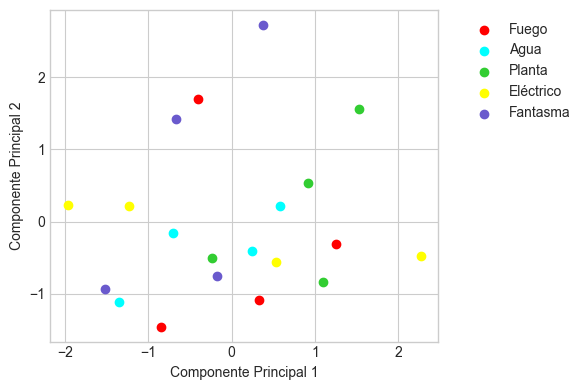

In [70]:
#Instanciamos un objeto PCA, cogiendo solo los dos primeros componentes
pca2 = PCA(n_components=2)

#Pokemon_estand = Pokemon_Dataset[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']]
#Ajustamos los datos del dataframe creado
X_pca = pca2.fit_transform(Pokemon_estand)


# Creación del diagrama de dispersión
#Cogemos la columna de tipos que utilizamos para mostrarlo en la gráfica
columna_tipo1 = Pokemon_Dataset.iloc[:,1].values
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs1 = [(np.abs(pcautovalores[i]), pcautovectores[:,i]) for i in range(len(pcautovalores))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs1.sort(key=lambda x: x[0], reverse=True)

#Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])


#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w1 = np.hstack((eig_pairs1[0][1].reshape(6,1),
                      eig_pairs1[1][1].reshape(6,1)))
#print('\nMatriz W:\n', matrix_w1)

#Introducimos la matriz de pares autovalor-autovector en el eje Y
Y = Pokemon_Dataset_Final.dot(matrix_w1)

#Creamos la grafica mostrando una leyenda por tipos y según las dos componentes principales
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Fuego', 'Agua', 'Planta', 'Eléctrico', 'Fantasma'),
                        ('red', 'cyan', 'limegreen', 'yellow', 'slateblue')):
        plt.scatter(Y[columna_tipo1==lab, 0],
                    Y[columna_tipo1==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Podemos ver una diferencia notable en la dispersión de los datos, ya que con la función PCA las varianzas explicadas de los componentes principales utilizados son superiores. Por lo tanto, la gráfica y los individuos varían en su representación.